**кластеризатор текстов**

SnowballStemmer + TFIDF + DBSCAN

_Евгений Борисов <esborisov@sevsu.ru>_

## тексты

In [1]:
import pandas as pd
pd.options.display.precision = 2 
pd.options.display.max_colwidth = 200 

from tqdm.notebook import tqdm
tqdm.pandas()

In [2]:
# загружаем тексты
data = pd.read_pickle('../data/news.pkl.gz')
print('записей:',len(data))
data.sample(2)

записей: 3196


,text,tag
1040,Курс валют на завтра в вашем смартфоне уже сегодня\n\n4 декабря 2016 в 9:00\n\nPR-служба TUT.BY\n\nПриложение «Финансы TUT.BY» радует белорусских пользователей усовершенствованными функциями. В сч...,economics
1051,"Банк Англии прислушался к веганам, которые возмутились ""жирными"" банкнотами\n\n1 декабря 2016 в 11:47\n\nFINANCE.TUT.BY\n\nБанк Англии отреагировал на петицию веганов, в которой они пожаловались н...",economics


## токенайзер со стемингом и очисткой

In [3]:
import re
# from nltk.tokenize import sent_tokenize as nltk_sentence_split
from nltk.tokenize import word_tokenize as nltk_tokenize_word
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords as nltk_stopwords

In [4]:
stemmer = SnowballStemmer('russian')
stopwords = set(nltk_stopwords.words('russian'))

In [5]:
# def tokenizer(text,stemmer=stemmer,stopwords=stopwords):
#     return [
#             stemmer.stem(t) # выполняем стеминг
#             for t in nltk_tokenize_word( # разбиваем текст на слова
#                 re.sub(r'</?[a-z]+>',' ',text), # удаляем xml tag 
#                 language='russian'
#             ) 
#             if not (
#                (len(t)<3) # выкидываем очень короткие слова
#                or re.match(r'^[^a-zA-ZЁёА-я]+$', t) # выкидываем токены не содержащие букв
#                or re.match(r'^(\w)\1+$', t)  # выкидываем токены из одного повторяющегося символа
#                or re.match(r'^[^a-zA-ZЁёА-я].*$', t)  # выкидываем токены начинающиеся не с буквы
#                or (t in stopwords) # выкидываем предлоги, союзы и т.п.    
#             )
#         ] 
    
# # data['text'].progress_apply(tokenizer)

In [6]:
def tokenizer(text,stopwords=stopwords):
    return [
            t # выполняем стеминг
            for t in nltk_tokenize_word( # разбиваем текст на слова
                re.sub(r'</?[a-z]+>',' ',text), # удаляем xml tag 
                language='russian'
            ) 
            if not (
               # (len(t)<3) # выкидываем очень короткие слова
               re.match(r'^[^a-zA-ZЁёА-я]+$', t) # выкидываем токены не содержащие букв
               or re.match(r'^(\w)\1+$', t)  # выкидываем токены из одного повторяющегося символа
               or re.match(r'^[^a-zA-ZЁёА-я].*$', t)  # выкидываем токены начинающиеся не с буквы
               or (t in stopwords) # выкидываем предлоги, союзы и т.п.    
            )
        ] 

In [7]:
# def tokenizer(text):
#     return [
#             t for t in nltk_tokenize_word( # разбиваем текст на слова
#                 re.sub(r'</?[a-z]+>',' ',text), # удаляем xml tag 
#                 language='russian'
#             ) 
#             if not (
#                #(len(t)<3) # выкидываем очень короткие слова
#                re.match(r'^[^a-zA-ZЁёА-я]+$', t) # выкидываем токены не содержащие букв
#                or re.match(r'^(\w)\1+$', t)  # выкидываем токены из одного повторяющегося символа
#                or re.match(r'^[^a-zA-ZЁёА-я].*$', t)  # выкидываем токены начинающиеся не с буквы
#             )
#         ]

## выполняем частотный анализ

In [9]:
%%time

from sklearn.feature_extraction.text import TfidfVectorizer

# использования токенайзера вместе с векторайзером
tf_model = TfidfVectorizer(
        min_df=.01, # выкидываем очень редкие слова
        max_df=.25, # выкидываем очень частые слова
        use_idf=False, # не используем обратную частоту
        norm='l2', # нормируем TF
        tokenizer=tokenizer, # ф-ция токенайзер
        token_pattern=None, # отключаем дефолтный токенайзер
    )

# from sklearn.feature_extraction.text import CountVectorizer
# tf_model = CountVectorizer(
#         min_df=.01, # выкидываем очень редкие слова
#         max_df=.25, # выкидываем очень частые слова
#         tokenizer=tokenizer, # ф-ция токенайзер
#         token_pattern=None, # отключаем дефолтный токенайзер
#     )

data_tf = tf_model.fit_transform( data['text'] )

CPU times: user 5.73 s, sys: 0 ns, total: 5.73 s
Wall time: 5.73 s


In [10]:
data_tf.shape

(3196, 2064)

In [13]:
data_tf.min(),data_tf.mean(),data_tf.max(),

(0.0, 0.002791091705709613, 1.0)

In [11]:
vcb1 = sorted(tf_model.vocabulary_)
print(len(vcb1))
sorted(vcb1) #.sample(10)

2064


['adobe',
 'afisha.tut.by',
 'apple',
 'audi',
 'auto.tut.by',
 'facebook',
 'finance.tut.by',
 'flash',
 'html5',
 'http',
 'javascript',
 'journal',
 'kia',
 'lenta.ru',
 'news',
 'of',
 'player',
 'realty.tut.by',
 'regnum',
 'reuters',
 's',
 'sport.tut.by',
 'street',
 'telegram',
 'the',
 'times',
 'tut.by',
 'twitter',
 'volkswagen',
 'wall',
 'youtube',
 'абсолютно',
 'аварии',
 'авария',
 'августа',
 'августе',
 'авто',
 'автобуса',
 'автомобилей',
 'автомобилем',
 'автомобили',
 'автомобиль',
 'автомобиля',
 'автор',
 'авторы',
 'агентства',
 'агентство',
 'администрации',
 'адрес',
 'актер',
 'активно',
 'активность',
 'акции',
 'акций',
 'александр',
 'александра',
 'александром',
 'алексей',
 'алеппо',
 'американская',
 'американские',
 'американский',
 'американских',
 'американского',
 'американской',
 'америки',
 'анализ',
 'аналитики',
 'андрей',
 'андрея',
 'анна',
 'армии',
 'ассоциации',
 'атмосферу',
 'базе',
 'базовой',
 'банк',
 'банка',
 'безопасности',
 'белару

## кластеризируем

In [14]:
from sklearn.cluster import DBSCAN
data['cluster'] = DBSCAN(eps=.98,min_samples=3).fit(data_tf).labels_
# data['cluster'] = DBSCAN(eps=7.,min_samples=3).fit(data_tf).labels_


# from sklearn.cluster import KMeans
# data['cluster'] = KMeans(10).fit(data_tf).labels_

data['cluster'].drop_duplicates().count()

127

In [15]:
# номер кластера, количество объектов, метки объектов
# (cluster=-1 - некластеризованные DBSCAN объекты) 
cluster_descr = pd.concat([
        data[['cluster','tag']].groupby(['cluster'])['tag'].count(),
        data[['cluster','tag']].groupby(['cluster'])['tag'].apply(lambda s: set(s)).apply(' '.join)
    ],axis=1).reset_index()

cluster_descr.columns = ['cluster','count','tags']

cluster_descr

,cluster,count,tags
0,-1,2192,culture realty politics sport incident economics reclama science tech auto health social woman
1,0,3,politics
2,1,4,culture tech health sport
3,2,6,sport
4,3,15,culture incident economics sport
...,...,...,...
122,121,3,culture
123,122,3,social
124,123,7,social
125,124,3,health


<AxesSubplot: xlabel='cluster'>

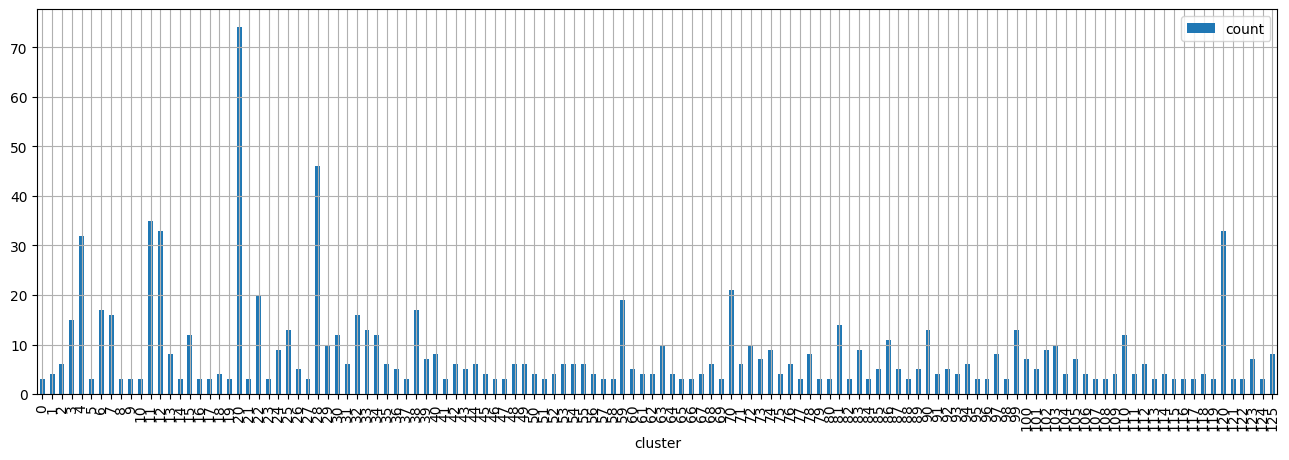

In [16]:
# размеры кластеров
cluster_descr[['cluster','count']]\
    .query('cluster>-1')\
    .set_index('cluster')\
    .plot.bar(grid=True,figsize=(16,5))

In [17]:
def print_cluster_samples(n,ns=3,nt=300):
    count,tags = cluster_descr.query(f'cluster=={n}')[['count','tags']].values[0]#.tolist
    df = data.query(f'cluster=={n}')
    ns_ = min(ns,len(df))
    top = [ t[:nt].replace('\n',' ') for t in df['text'].sample(ns_).values ]
    print('[ КЛАСТЕР %i, элементов: %i, метки: "%s" ]'%(n,count,tags))
    for s in top: print('\n%s ...\n'%(s) )

In [18]:
from numpy import random as rng

for n in rng.permutation(cluster_descr['cluster'].max())[:3] :
    print_cluster_samples(n)
    print('\n= = = = = = = = = = = = = = = = = = = = = = = = = =\n')

[ КЛАСТЕР 115, элементов: 3, метки: "auto" ]

Вашингтон, , 10:48 — REGNUM В руководстве немецкой компании Volkswagen рассматривают вариант выпуска нового большого пикапа, который мог бы конкурировать на рынке Северной Америки с такими моделями, как Dodge Ram и Ford F-150. Об этом заявил глава подразделения VW в США Генрих Вебкен, сообщает Auto  ...


По словам главы подразделения Volkswagen в США, руководство компании надеется на то, что 70% от общего объёма данного сегмента помогут занять автомобили, подобные Atlas, а на оставшиеся 30% придутся большие пикапы на раме лестничного типа. Однако пока компания не располагает подходящей платформой дл ...


Руководство немецкой компании Volkswagen рассматривает перспективы выпуска нового большого пикапа, который смог бы составить конкуренцию таким моделям, как Dodge Ram и Ford F-150 на североамериканском рынке. Об этом информирует издание Auto Express, ссылаясь на главу подразделения VW в США Генриха В ...


= = = = = = = = = = = = = = = = =

In [ ]:
## библиотеки

In [ ]:
# import re
# # import gzip
# import numpy as np
# import numpy.random as rng
# import pandas as pd
# from tqdm.notebook import tqdm

# np.set_printoptions(precision=2) # вывод на печать чисел до 2 знака
# pd.options.display.max_colwidth = 200 

# tqdm.pandas()

In [ ]:
# from sklearn import __version__ as SKLEARN_VERSION

# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.cluster import DBSCAN

# from matplotlib import pyplot as plt

# SKLEARN_VERSION

In [ ]:
# from nltk.stem.snowball import SnowballStemmer
# from nltk.corpus import stopwords as nltk_stopwords
# # from nltk import download as nltk_download
# # nltk_download('stopwords')

In [ ]:
## тексты

In [ ]:
# # загружаем тексты
# data = pd.read_pickle('../data/news.pkl.gz')
# print('записей:',len(data))

In [ ]:
# data.sample(2)

In [ ]:
## токенизация и очистка

In [ ]:
# # применяет список замен pat к строке s
# def replace_patterns(s,pat):
#     if len(pat)<1: return s
#     return  replace_patterns( re.sub(pat[0][0],pat[0][1],s), pat[1:] )

# # нормализация текста
# def string_normalizer(s):
#     pat = [
#        [r'ё','е'] # замена ё для унификации
#        ,[r'</?[a-z]+>',' '] # удаляем xml
#        ,[r'[^a-zа-я\- ]+',' '] # оставляем только буквы, пробел и -
#        ,[r' -\w+',' '] # удаляем '-й','-тый' и т.п.
#        ,[r'\w+- ',' ']
#        ,[r' +',' '] # удаляем повторы пробелов
#     ]
#     return replace_patterns(s.lower(),pat).strip()

In [ ]:
# data['ctext'] = data['text'].progress_apply(string_normalizer)

In [ ]:
##  Vectorizer

In [ ]:
# from nltk.stem.snowball import SnowballStemmer
# from nltk.corpus import stopwords as nltk_stopwords

# stopwords = set(nltk_stopwords.words('russian'))
# stemmer = SnowballStemmer('russian')

# # разрезаем стоки на слова, выкидываем stopwords, выполняем стеминг
# def tokenizer_stemmer(s,stemmer=stemmer,stopwords=stopwords): 
#     for w in s.split(' '):
#         o = stemmer.stem(w).replace('^','')
#         if len(o)<2: continue
#         if o in stopwords: continue
#         yield o        

In [ ]:
# %%time

# X = TfidfVectorizer(
#         use_idf=True,
#         norm='l2',
#         tokenizer=tokenizer_stemmer,
#         token_pattern=None,
#     ).fit_transform( data['ctext'] )

In [ ]:
# X.shape